In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
def dft(f):
    N = len(f)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += f[t] * np.exp(-2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y)

def idft(F):
    N = len(F)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += F[t] * np.exp(2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y) / N

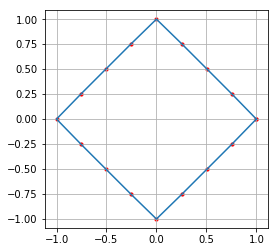

In [522]:
n = 4
p = n * 4
theta = np.linspace(0, 2*np.pi, p+1) #theta = np.arange(0, 2*np.pi, np.pi/div)
F = 30
V = sum([1 / (1 + f * n)**2 * np.exp((1 + f * n) * 1j * theta) for f in range(-F // 2, F // 2)])
V /= sum([1 / (1 + f * n)**2 for f in range(-F // 2, F // 2)])

x = V.real
y = V.imag

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.axis('equal')
ax.plot(x, y, alpha=1)
ax.scatter(x, y, s=10, c='r')

C: [-7 -3  1  5]


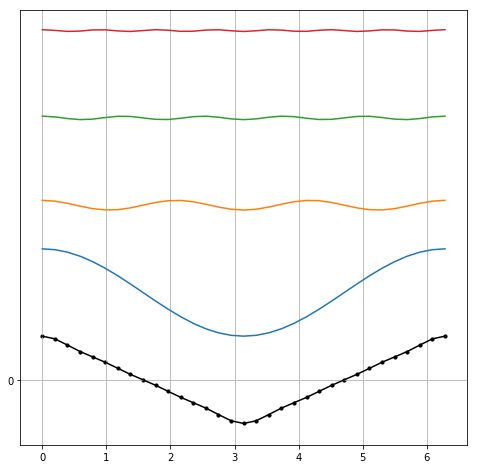

In [514]:
n = 4
t = np.linspace(0, 2*np.pi, 33)
F = 4
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
AS = np.argsort(abs(C))
print('C:', C)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yticks([0])

x, y = 0, 0
for i in range(len(C)):
    yy = 1/C[AS[i]]**2 * np.cos(C[AS[i]]*t)
    ax.plot(t, yy+(i+1)*2)
    x += 1/C[AS[i]]**2 * np.sin(C[AS[i]]*t)
    y += 1/C[AS[i]]**2 * np.cos(C[AS[i]]*t)
    
x /= sum(1/C**2)
y /= sum(1/C**2)
ax.plot(t, y, c='k')
ax.scatter(t, y, c='k', s=10)

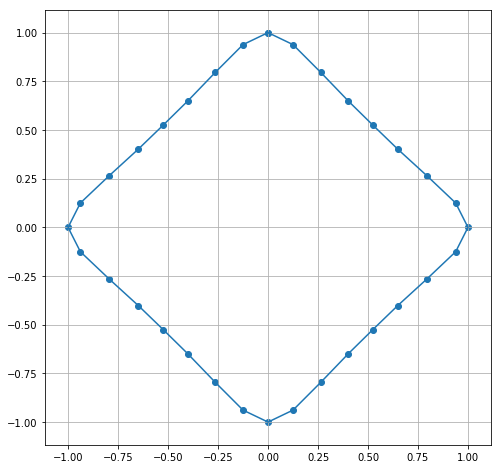

In [512]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x, y)
ax.scatter(x, y)

[-7 -3  1  5]


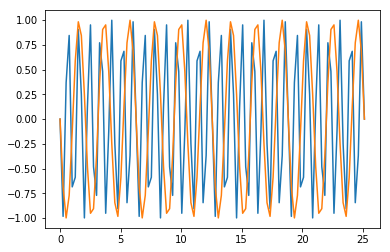

In [366]:
n = 4
t = np.linspace(0, 2*np.pi*4, 101)
F = 4
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
print(C)

y0 = 1/C[0]**2 * np.sin(C[0]*t) / (1/C[0]**2)
plt.plot(t, y0)
y1 = 1/C[1]**2 * np.sin(C[1]*t) / (1/C[1]**2)
plt.plot(t, y1)

In [3]:
n = 4
N = n * 12
theta = np.linspace(0, 2*np.pi, N+1)
#theta = np.arange(0, 2*np.pi, np.pi/div)
F = 4
C = np.array([(1 + f * n) for f in range(-F//2, F//2)])
print('C:', len(C))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, facecolor='w')
ax.axis('equal')

ims = []
X = []
Y = []
for t in theta:
    V = np.sum(1/C**2 * np.exp(1j*C*t)) / np.sum(1/C**2)    
    x = V.real
    y = V.imag
    P1 = ax.plot(x, y)
    P2 = ax.plot(C.real/len(C), C.imag/len(C), c='b')
    P3 = ax.scatter(x, y, s=10, c='r')
    ims.append(P1 + P2 + [P3])
    
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.close()
HTML(ani.to_jshtml())

C: 4


In [ ]:
# test
A = dft(V)
AS = np.argsort(A)[::-1]
#AS = np.array(list(range(len(A))))
N = len(A)
print(N)

ct = np.linspace(0, 2*np.pi, 65)

plt.figure(figsize=(8, 8))
plt.grid()
plt.axis('equal')

for k in range(1):
    w = 0
    W = []
    for a in AS:
        pw = w
        w += A[a] * np.exp(a * 2j * np.pi * k/N)
        W.append(w)
    W = np.array([0]+W[:-1])   
    radius = np.abs(A[AS]) / N
    c = np.array([r * np.exp(1j * ct) for r in radius]).T
    P1 = plt.plot(c.real + W.real/N, c.imag + W.imag/N, c='gray', lw=0.6)
    
    W = np.array(list(W))
    P2 = plt.plot(W.real/N, W.imag/N, color='red', alpha=0.3)
        
    #W.append(w)
    p3 = plt.scatter(W[-1].real/N, W[-1].imag/N, s=40, c='r')

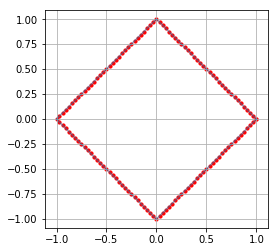

In [6]:
n = 4
F = n * 32
theta = np.linspace(0, 2*np.pi, F+1) 
#theta = np.arange(0, 2*np.pi, 2*np.pi/F)
V = sum([1 / (1 + f * n)**2 * np.exp((1 + f * n) * 1j * theta) for f in range(-F // 2, F // 2)])
V /= sum([1 / (1 + f * n)**2 for f in range(-F // 2, F // 2)])

x = V.real
y = V.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.scatter(x, y, s=10, c='r')

In [7]:
#A = np.fft.fft(V)
#V = np.fft.ifft(A)
A = dft(V)
AS = np.argsort(A)[::-1]
N = len(V)
print(N)
ct = np.linspace(0, 2*np.pi, 65)

fig = plt.figure(figsize=(8, 8))
plt.grid()
plt.axis([-1.1, 1.1, -1.1, 1.1], 'equal')
ims = []
X = []
Y = []
for k in range(N):
    W = []
    w = 0
    for a in AS:
        w += A[a] * np.exp(a * 2j * np.pi * k/N) 
        W.append(w) 

    W = np.array([0]+W[:-1])
    P1 = plt.plot(W.real/N, W.imag/N, c='red', alpha=0.5)
    
    rad = np.abs(A[AS]) / N
    C = np.array([r * np.exp(1j * ct) for r in rad]).T
    P2 = plt.plot(C.real+W.real/N, C.imag+W.imag/N, color='gray', alpha=0.3)
    P3 = plt.scatter(W[-1].real/N, W[-1].imag/N, s=40, color='red')
    X.append(W[-1].real/N)
    Y.append(W[-1].imag/N)
    P4 = plt.plot(X, Y, color='blue', alpha=0.7)
    ims.append(P1 + P2 + [P3] + P4)
    
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.close()
HTML(ani.to_jshtml())

129


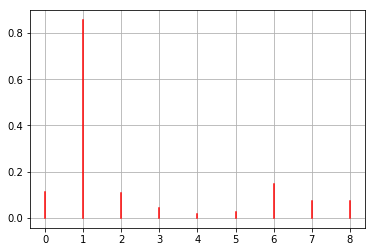

In [203]:
A = dft(V) / len(A)
#A = np.fft.fft(V) / len(V)
#B = np.sort(A)#[::-1]
B = np.sort(abs(A))
#B = np.fft.fft(V)

for i in range(len(A)):
    plt.plot([i, i], [0, abs(A[i])], c='red')
    #plt.plot([i+0.1, i+0.1], [0, abs(B[i])], c='blue')
plt.grid()

<pre>
function epiCycles(x, y, rotation, fourier) {  
  for (let i = 0; i < fourier.length; i++) {  
    let prevx = x;  
    let prevy = y;  
    let freq = fourier[i].freq;  
    let radius = fourier[i].amp;  
    let phase = fourier[i].phase;  
    x += radius * cos(freq * time + phase + rotation);  
    y += radius * sin(freq * time + phase + rotation);  

    stroke(255, 100);
    noFill();
    ellipse(prevx, prevy, radius * 2);
    stroke(255);
    line(prevx, prevy, x, y);
  }
  return createVector(x, y);
}
</pre>

In [79]:
import IPython.display
duration = 2
rate = 4000

w1 = np.sin(440 * 2 * np.pi * np.linspace(0, duration, duration * rate))
#w2 = np.sin(220 * 2 * np.pi * np.linspace(0, duration, duration * rate))
#w = np.concatenate([w1, w1[::-1]])
IPython.display.Audio(w1, rate=rate)

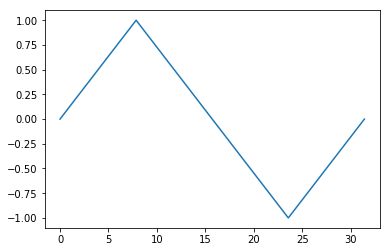

In [457]:
n = 4
t = np.linspace(0, 2*np.pi, n+1)
h = 5
a = np.exp(1j*h*t)
plt.plot(t, a.imag)